# Introduction 

#### Stock market sentiment analysis is an evolving technique which can be effectively used to compliment fundamental, quantitative and technical analysis.

## Business Understanding 

#### Market sentiment is a qualitative measure of the attitude and mood of investors to financial markets in general, and specific sectors or assets in particular. Positive and negative sentiment drive price action, and also create trading and investment opportunities for active traders and long-term investors

## import the packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Load in the data
data = pd.read_csv("stock_data.csv")

In [3]:
## Read the data
data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [8]:
data.shape

(5791, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
Text         5791 non-null object
Sentiment    5791 non-null int64
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


#### As we can see from our data.info, No missing Value

In [9]:
data.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
## Sentiment Value count 
data["Sentiment"].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

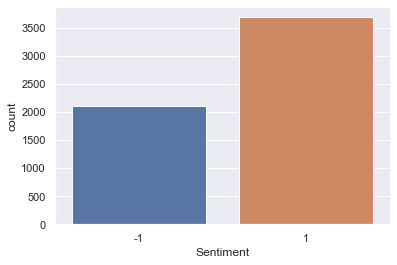

In [11]:
## Plot the Sentiment value count 
sns.countplot(data["Sentiment"])

#### As we can see our Sentiment contains Positive and Negative Ones. Based on the Countplot we have more Positive values than Negative


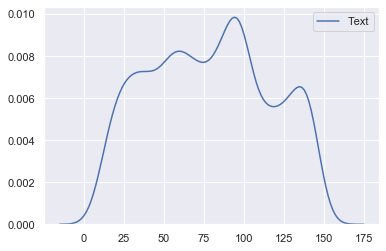

In [12]:
## Lenght of the Text using KDEplot
lenght = data["Text"].str.len()
sns.kdeplot(lenght)

In [13]:
## Checking for stopwords
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'so', 'couldn', "don't", 'after', 'mightn', 't', 'as', 'he', 's', 'those', 'our', 'itself', 'my', 'you', 'hadn', 'having', 'some', 'are', "doesn't", 'if', 'over', 'too', 'before', 'again', 'while', 'more', 'wouldn', 'where', 'myself', 'but', 'with', 'whom', 'from', 'than', "mustn't", "haven't", 've', 'do', "mightn't", 'was', 'in', 'am', 'who', "aren't", 'into', 'own', 'been', 'against', 'why', 'which', 'few', 'is', 'very', 'by', 'there', 'no', 'd', 'off', "didn't", 'll', 'during', 'that', 'other', 'above', 'same', "shan't", 'and', "she's", 'most', 'your', 're', 'each', 'once', 'won', "won't", 'they', 'this', 'themselves', 'does', 'her', 'these', "wasn't", 'or', "should've", 'yourselves', 'ain', 'were', 'hers', 'be', 'up', 'an', 'then', 'ours', 'had', "you've", 'mustn', 'can', 'now', 'what', 'haven', 'them', 'between', 'both', 'should', 'did', 'at', 'doing', 'when', 'such', 'wasn', 'we', 'yours', 'me', 'through', 'down', "isn't", 'i', 'being', "couldn't", 'ma', 'himself', 'below', 'it'

In [15]:
word_list = list()
for i in range(len(data)):
    lip = data.Text[i].split()
    for k in lip:
        word_list.append(k)

In [17]:
from collections import Counter 
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('the', 1796),
 ('to', 1668),
 ('a', 1280),
 ('on', 1032),
 ('of', 944),
 ('in', 891),
 ('AAP', 884),
 ('for', 868),
 ('and', 850),
 ('is', 811),
 ('-', 728),
 ('at', 541),
 ('this', 461),
 ('it', 454),
 ('I', 453),
 ('up', 357),
 ('user:', 340),
 ('from', 331),
 ('will', 330),
 ('be', 324)]

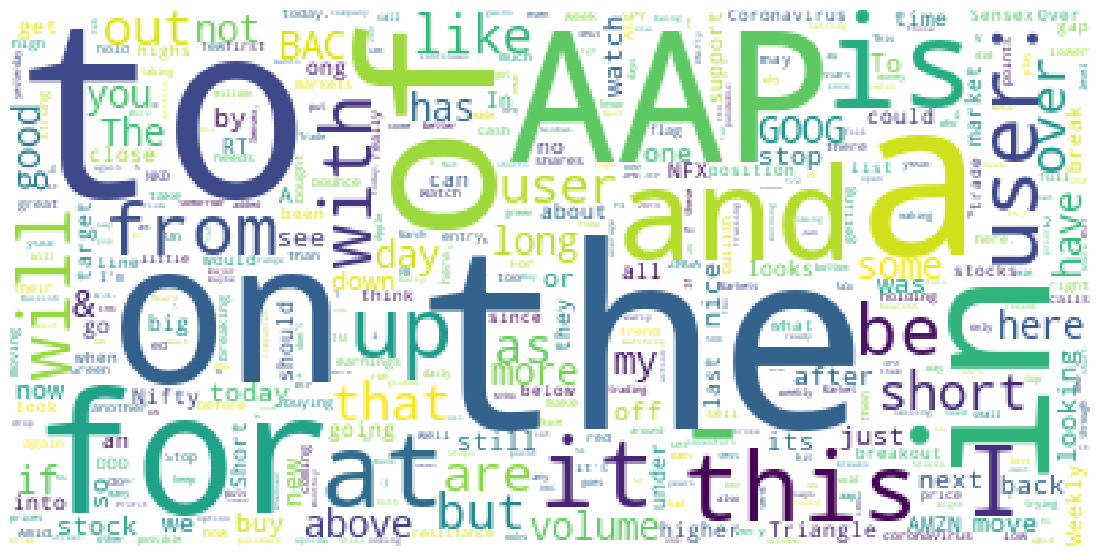

In [21]:
from wordcloud import WordCloud
wordList2 = " ".join(word_list)
stop_word_Cloud = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_word_Cloud,max_words=2000,background_color="white",min_font_size=3).generate_from_frequencies(countedWordDict)
plt.figure(figsize=[20,10])
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

# Data Preprocessing

In [24]:
## Replacing the negative one with zero so our model can predict well
data["Sentiment"] = data["Sentiment"].replace(-1,0)

In [27]:
## Lets check our data again
data["Sentiment"].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

In [29]:

data.shape

(5791, 2)

# NLP Processing 

In [22]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer

In [23]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words("english"))

In [35]:
## Clean the text
import nltk
import re 
import nltk
nltk.download('wordnet')
  
text_reviews = list()
for i in range(len(data)):
    text = re.sub('[^a-zA-Z]'," ",data['Text'][i])
    text = text.lower()
    text = word_tokenize(text,language="english")
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordSet]
    text = " ".join(text)
    text_reviews.append(text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [36]:
## Create the (B.O.W) bag of word model
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(text_reviews).toarray()
y= data['Sentiment']

## Split the dataset into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 0)

# Modelling and Prediction

In [38]:
## Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68       417
           1       0.81      0.86      0.84       742

    accuracy                           0.78      1159
   macro avg       0.77      0.75      0.76      1159
weighted avg       0.78      0.78      0.78      1159



In [49]:
print(confusion_matrix(y_test, Y_pred))

[[268 149]
 [102 640]]


In [54]:
## Naives baye multinomial
clf = MultinomialNB()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

In [55]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       417
           1       0.83      0.84      0.83       742

    accuracy                           0.79      1159
   macro avg       0.77      0.77      0.77      1159
weighted avg       0.79      0.79      0.79      1159



In [56]:
print(confusion_matrix(y_test, Y_pred))

[[291 126]
 [120 622]]


In [57]:
## Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)

In [58]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       417
           1       0.85      0.81      0.83       742

    accuracy                           0.79      1159
   macro avg       0.77      0.78      0.77      1159
weighted avg       0.79      0.79      0.79      1159



In [59]:
print(confusion_matrix(y_test, Y_pred))

[[310 107]
 [139 603]]


# Conclusion

Random forest and  MultinomialNB produced the predictions with the highest accuracy, at 79%, while logistic regression scored 78%.